# Using Regression Models For First Hypothesis

#### In our first hypothesis, we assumed that the average rating decreases as the delivery time increases. This seems to be a linear relation. So, we perform a linear regression to determine the relationship.

## Imports

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Reading the dataset

In [26]:
df = pd.read_csv('../food_delivery_dataset/train.csv')

df = df.replace('NaN', np.nan, regex=True)

df['Delivery_person_Ratings'] = pd.to_numeric(df['Delivery_person_Ratings'], errors='coerce')

Average_rating = df['Delivery_person_Ratings'].mean()
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].fillna(round(Average_rating, 1))

delivery_time = np.array(df['Time_taken(min)'].str.split(" ").str[1]).astype(int)
ratings = np.array(df['Delivery_person_Ratings'])

data = {
    'delivery_time': delivery_time,
    'ratings': ratings
}

model_input = pd.DataFrame(data)

model_input

,delivery_time,ratings
0,24,4.9
1,33,4.5
2,26,4.4
3,21,4.7
4,30,4.6
...,...,...
45588,32,4.8
45589,36,4.6
45590,16,4.9
45591,26,4.7


In [27]:
mean_input = model_input.groupby(delivery_time)['ratings'].mean()

mean_input = mean_input.to_frame().reset_index()

# Linear Regression

Intercept (beta_0): 4.836381593584211
Slope (beta_1): -0.007887255576593012
Mean Squared Error: 0.009727460975453768
R-squared: 0.5189191294105682


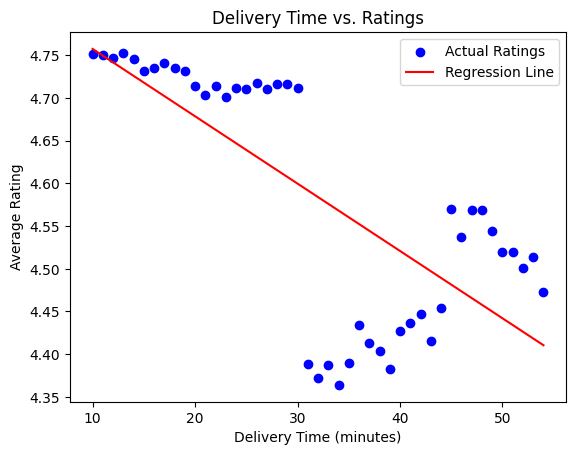

In [28]:
delivery_time = mean_input['index'].values.reshape(-1, 1)  # Reshape to a 2D array
ratings = mean_input['ratings'].values

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(delivery_time, ratings)

# Predictions for the model
ratings_pred = model.predict(delivery_time)

# Print the coefficients of the linear regression model
print(f"Intercept (beta_0): {model.intercept_}")
print(f"Slope (beta_1): {model.coef_[0]}")

# Model evaluation
mse = mean_squared_error(ratings, ratings_pred)
r2 = r2_score(ratings, ratings_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the data and the regression line
plt.scatter(delivery_time, ratings, color='blue', label="Actual Ratings")
plt.plot(delivery_time, ratings_pred, color='red', label="Regression Line")
plt.title('Delivery Time vs. Ratings')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Average Rating')
plt.legend()
plt.show()

### Using Linear regression, as we can see there are huge errors in the predicted model. The graph doesn't align with the data.

### Since, we used a linear regression, we could only draw a straight line. If we try to use a polynomial regression, we can have a graph that aligns to the data better with a curve.

# Polynomial Regression of degree 2

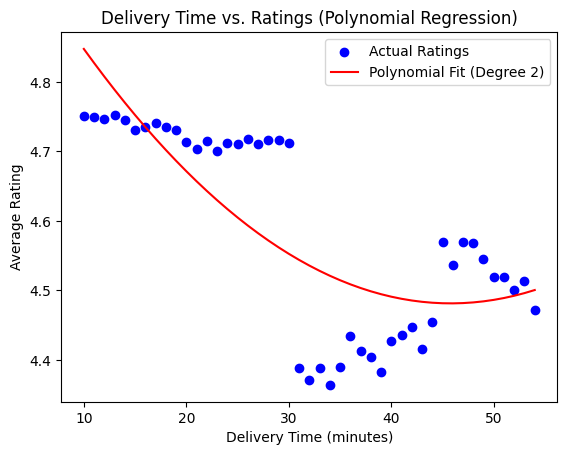

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(delivery_time.reshape(-1, 1))

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, ratings)

# Predict values
y_pred = model.predict(X_poly)

# Plotting the data
plt.scatter(delivery_time, ratings, color='blue', label='Actual Ratings')
plt.plot(delivery_time, y_pred, color='red', label='Polynomial Fit (Degree 2)')
plt.title('Delivery Time vs. Ratings (Polynomial Regression)')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Average Rating')
plt.legend()
plt.show()


### We were able to get a better graph using Polynimial Regression. Now, we want to explore polynomial regression of higher degree. We can use accuracy as a parameter to determine if the model is performing better.

### If we increase the degree of polynomial, we can get a better graph that can align with the data better. Calculating the accuraccy for the same.

### Since, this was a polynoimal graph of degree 2, we see the graph with 1 maxima or 1 minima. (1 cursve) We want to go to a grpah with higher degree (more curves)

In [32]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = X_poly
y = ratings

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the features to polynomial features (degree 3)
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_pred = model.predict(X_test_poly)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f"R-squared: {r2:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")

R-squared: 0.816
Mean Absolute Error: 0.041
Mean Squared Error: 0.003
Root Mean Squared Error: 0.053


### We were able to get the Mean Absolute Error, Mean Squared Error and Root mean squared error. Lets try the same with a polynomial regression of higher degree.

# Polynomial regression of degree 3

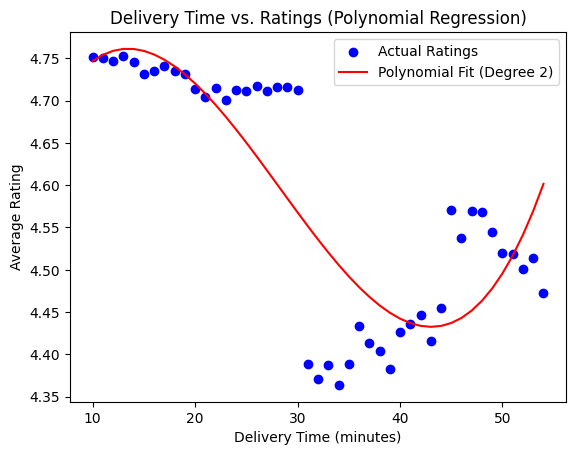

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(delivery_time.reshape(-1, 1))

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, ratings)

# Predict values
y_pred = model.predict(X_poly)

# Plotting the data
plt.scatter(delivery_time, ratings, color='blue', label='Actual Ratings')
plt.plot(delivery_time, y_pred, color='red', label='Polynomial Fit (Degree 2)')
plt.title('Delivery Time vs. Ratings (Polynomial Regression)')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Average Rating')
plt.legend()
plt.show()


### Here we are able to get a better graph compared to a Polynomial Regression of degree 2. Let try to compute the accuracy for the same.

In [34]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = X_poly
y = ratings

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the features to polynomial features (degree 3)
degree = 3
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_pred = model.predict(X_test_poly)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f"R-squared: {r2:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")

R-squared: 0.931
Mean Absolute Error: 0.024
Mean Squared Error: 0.001
Root Mean Squared Error: 0.032


### As we can see, the accuracy has increased compared to Polynimal regression of degree 2.

### Here, since the grpah has a degree 3, we were able to get a graph with 2 extremes. As a result, the graph fits the data better.

# Decisioin Tree Regression

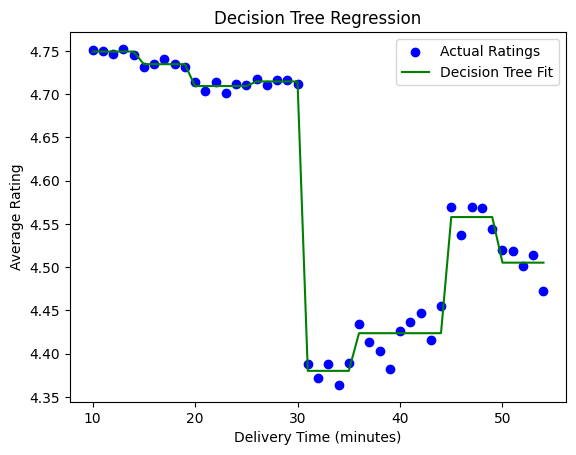

In [38]:
from sklearn.tree import DecisionTreeRegressor

# Fit the decision tree regression model
tree_model = DecisionTreeRegressor(max_depth=3)  # Control depth to prevent overfitting
tree_model.fit(delivery_time, ratings)

# Predict and plot
y_pred_tree = tree_model.predict(delivery_time)

plt.scatter(delivery_time, ratings, color='blue', label='Actual Ratings')
plt.plot(delivery_time, y_pred_tree, color='green', label='Decision Tree Fit')
plt.title('Decision Tree Regression')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Average Rating')
plt.legend()
plt.show()

### Here the model is following the graph too closely. We might run into over-fitting.

In [39]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


X = delivery_time
y = ratings

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.3f}")

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.3f}")

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.3f}")

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.3f}")

R-squared: 0.887
Mean Absolute Error: 0.025
Mean Squared Error: 0.002
Root Mean Squared Error: 0.041


### As we see the accuracy went down, do Polynomial regression is the best fit for the data.

### We can see here, we have a case of overfitting. The accuracy for Testing data has gone down. So, to conclude, Polynomial regression of degree 3 is the best fit for the data.